<a href="https://colab.research.google.com/github/jycontrol/ClassRIS/blob/main/RootLocus02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 근궤적법 예제 2

Python Control Systems Library의 설치와 이용방법은 다음 사이트 방문하시기 바랍니다.


https://python-control.readthedocs.io/

pip를 이용하여 Python Control Systems Library을 설치합니다.


In [ ]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 16.6 MB/s eta 0:00:00


본격적으로 Control Library를 사용하기 위한 필수 피키지와 라이브러리를 import 합니다.

본 예제에서는 matlab에서 사용되는 명령어를 적용하기 위해 control.matlab 모듈을 이용합니다. 자체적인 함수들도 있으니 참조 바랍니다.

In [ ]:
import matplotlib.pyplot as plt  # MATLAB plotting functions
import numpy as np
import control
from control.matlab import *

# **예제 2** (Ogata, Morden Control Engineering에서 발췌)

이번에는 개루프전달함수 $G(s)H(s)$가 다음과 같은 시스템을 고려합니다.

$G(s)H(s) = \frac{K}{s(s+0.5)(s^2+0.6s+10)}$

앞선 예와 마찬가지로 극점을 구해봅니다.

우선 convolution를 통해 분모 다항식을 구합니다.

In [ ]:
a = [1, 0.5, 0]
b = [1, 0.6, 10]
c = np.convolve(a, b)

In [ ]:
c

array([ 1. ,  1.1, 10.3,  5. ,  0. ])

위 결과는 분모다항식이

$s^4 + 1.1s^3 + 10.3s^2 + 5s$  이 됨을 의미합니다.

즉 개루프 전달함수의 특성방정식은 다음과 같습니다.

$s^4 + 1.1s^3 + 10.3s^2 + 5s = 0$

이제, 이 다항식의 근 즉 극점을 구해봅니다.

In [ ]:
r = np.roots(c)
r

array([-0.3+3.14801525j, -0.3-3.14801525j, -0.5+0.j        ,
        0. +0.j        ])

위 결과는 주어진 다항식의 근이 총 네개 임을 보여줍니다.

$-0.3 \pm j3.1480$, -0.5, 0

따라서 주어진 개루프 시스템의 영점과 극점은 다음과 같습니다.

개루프 영점: 없음

개루프 극점: $-0.3 \pm j3.1480$, -0.5, 0


다음은 위 정보를 토대로 근궤적선도를 그려보겠습니다.

/usr/local/lib/python3.11/dist-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


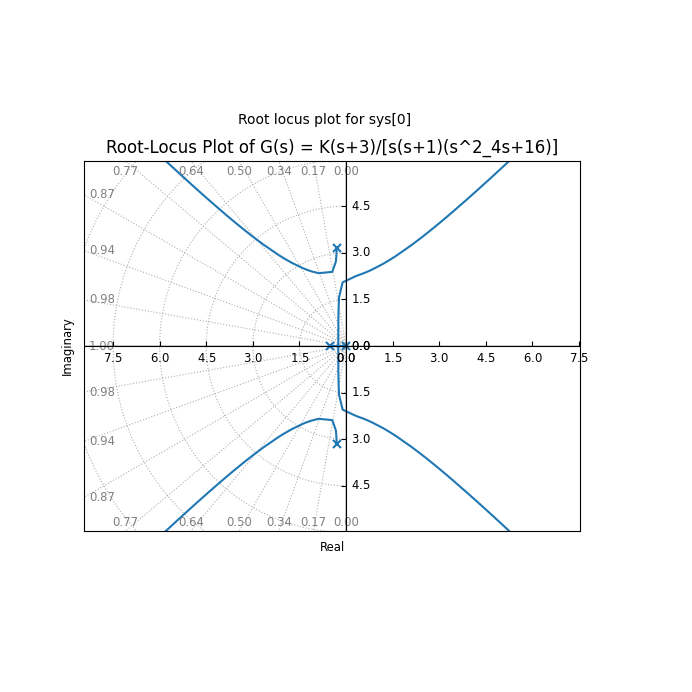

In [ ]:
#Program 1

num = [1]
den = [ 1,  1.1, 10.3, 5,  0]
G = control.tf(num, den)
plt.figure(1)
control.matlab.rlocus(G)
plt.title("Root-Locus Plot of G(s) = K/[s(s+0.5)(s^2+0.6s+10)]")
plt.show()


#등$\zeta$선과 등$\omega_n$원
위 그래프에서 등$\zeta$선과 등$\omega_n$원을 확인할 수 있습니다. 복소평면에서 한 쌍의 켤레복소극점에 의한 감쇠비 $\zeta$ 는 음의 실수축으로 부터 측정된 각도로 표시될 수 있음

![](https://dademuchconnection.wordpress.com/wp-content/uploads/2022/01/image-16.png)

 왼쪽 그림에서 보이는 것과 같이

 $\zeta = \cos \phi$의 각을 이루며 원점을 지나는 직선상에 존재해야한다.

 즉 감쇠비 $\zeta$가 일정한 선은 오른쪽 그림에 표시된 것과 같이 원점을 지나는 방사선 직선임. 예를 들어 감쇠비가 0.5가 되기 위해서는 복소극점은 음의 실수축과 $\pm 60^{\circ}$의 각을 이루며 원점을 지나는 직선상에 극점이 존재해야 한다.

 원점으로부터 극점까지의 거리는 비감쇠고유진동수 $\omega_n$에 의해 결정됨. 등$\omega_n$원 (constant $\omega_n$ circle)은 동심원으로 구성됨